In [1]:
from MoneyModel import *

In [2]:
model = MoneyModel(10)
for i in range(10):
    model.step()

(array([6., 0., 1., 0., 0., 1., 0., 1., 0., 1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

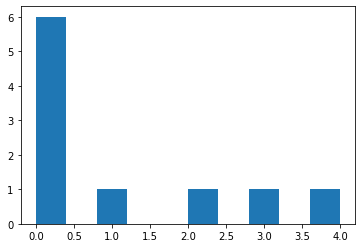

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

agent_wealth = [a.wealth for a in model.schedule.agents]
plt.hist(agent_wealth)

(array([411., 323., 166.,  64.,  32.,   1.,   3.]),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 <a list of 7 Patch objects>)

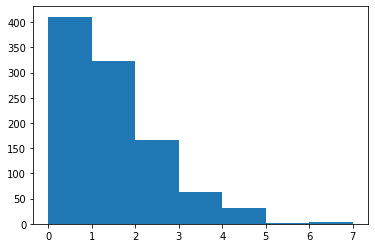

In [4]:
all_wealth = []
for j in range(100):
    # run the model
    model = MoneyModel(10)
    for i in range(10):
        model.step()
        
    # store the results
    for agent in model.schedule.agents:
        all_wealth.append(agent.wealth)
        
plt.hist(all_wealth, bins=range(max(all_wealth)+1))